### Importing our Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [ ]:
#setting our columns to display full values
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', '{:20,.2f}'.format)

### Installing important libraries

In [ ]:
#i had to install this to work on this excel file 
!pip install xlrd

### Reading our Dataset and Column Descriptions to our notebook


In [5]:
#importing the data
df = pd.read_excel("Week2_challenge_data_source.xlsx")

In [6]:
#importing the data description
df_descript = pd.read_csv("Field Descriptions - Sheet1.csv")

Removing all columns with space and lowering the  letters of the columns

In [7]:
df.columns = [label.replace(' ', '_').lower() for label in df.columns]

### Exploring our Datasets

I want to try to understand the data here and check for missing values 

We start with understanding what different columns stand for, here is a view of the different columns meaning this helps others understand this data too 

In [8]:
df_descript

,Fields,Description
0,bearer id,xDr session identifier
1,Dur. (ms),Total Duration of the xDR (in ms)
2,Start,Start time of the xDR (first frame timestamp)
3,Start ms,Milliseconds offset of start time for the xDR ...
4,End,End time of the xDR (last frame timestamp)
5,End ms,Milliseconds offset of end time of the xDR (la...
6,Dur. (s),Total Duration of the xDR (in s)
7,IMSI,International Mobile Subscriber Identity
8,MSISDN/Number,MS International PSTN/ISDN Number of mobile - ...
9,IMEI,International Mobile Equipment Identity


This shows us the different data types and number of non-null values in each columns

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   bearer_id                                 150001 non-null  object        
 1   start                                     150000 non-null  datetime64[ns]
 2   start_ms                                  150000 non-null  float64       
 3   end                                       150000 non-null  datetime64[ns]
 4   end_ms                                    150000 non-null  float64       
 5   dur._(ms)                                 150000 non-null  float64       
 6   imsi                                      149431 non-null  float64       
 7   msisdn/number                             148935 non-null  float64       
 8   imei                                      149429 non-null  float64       
 9   last_location_n

This shows us the Numbers of Rows and Columns in our dataset 

In [10]:
df.shape 

(150001, 55)

The numbers of unique values in each columns are shown below to understand a little bit, how the data is distributed 

In [11]:
df.nunique().sort_values(ascending=False)

total_dl_(bytes)                            149987
other_dl_(bytes)                            149986
gaming_dl_(bytes)                           149983
total_ul_(bytes)                            149728
youtube_dl_(bytes)                          149547
netflix_dl_(bytes)                          149518
netflix_ul_(bytes)                          149490
youtube_ul_(bytes)                          149477
gaming_ul_(bytes)                           149316
other_ul_(bytes)                            149284
google_dl_(bytes)                           149024
google_ul_(bytes)                           147267
email_dl_(bytes)                            146916
social_media_dl_(bytes)                     146856
email_ul_(bytes)                            138699
bearer_id                                   134709
dur._(ms).1                                 122871
start                                       111881
imei                                        107270
imsi                           

### Analysis of Null Values in our dataset

I want to analyze my dataset to understand where the null values are and how to deal with them 

In [12]:
#i am trying to understanding the null values here by analyzing the percentage of missing values in each columns
null = df.isna().sum().sort_values(ascending = False)
null_per = (null/150001) * 100
null_perc = pd.DataFrame(null_per)
null_perc.head(10)

,0
nb_of_sec_with_37500b_<_vol_ul,86.835421
nb_of_sec_with_6250b_<_vol_ul_<_37500b,74.561503
nb_of_sec_with_125000b_<_vol_dl,65.024900
tcp_ul_retrans._vol_(bytes),64.432237
nb_of_sec_with_31250b_<_vol_dl_<_125000b,62.390251
nb_of_sec_with_1250b_<_vol_ul_<_6250b,61.928920
nb_of_sec_with_6250b_<_vol_dl_<_31250b,58.877607
tcp_dl_retrans._vol_(bytes),58.763608
http_ul_(bytes),54.539636
http_dl_(bytes),54.315638


I have noticed the columns with a lot of missing values and would decide now how to impute this, i would be mean as already stated for numerical columns and median to replace null for Categorical columns 

I would start with getting all the missing numerical values in our missing data, i would turn all the values in null percent to a list of columns  

In [13]:
null_perc.reset_index(inplace=True)
missing = list(null_perc['index'])

We would append numerical values that are missing to one list and the categorical columns to another list

In [14]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numcols =[]
catcols = []
for data in missing:
    if df[data].dtypes in numerics:
        numcols.append(data)
    else:
        catcols.append(data)    

There are some values that are numerical but are not supposed to be like the IMEI, IMSI,MSISDN we would remove them from our list of numerical values

we would create a new list for the categorical values remove them from the numerical list and add to the categorical columns

In [15]:
catcoladd =['imei', 'imsi','msisdn/number']
for c in catcoladd:
    numcols.remove(c)

In [16]:
catcols.extend(catcoladd)

We would start with filling the missing values in the numerical column with the mean of the column

In [17]:
for col in numcols:
    df[col] = df[col].fillna(df[col].mean())

Confirm if what we did work

In [18]:
df[numcols].isnull().any()

nb_of_sec_with_37500b_<_vol_ul              False
nb_of_sec_with_6250b_<_vol_ul_<_37500b      False
nb_of_sec_with_125000b_<_vol_dl             False
tcp_ul_retrans._vol_(bytes)                 False
nb_of_sec_with_31250b_<_vol_dl_<_125000b    False
nb_of_sec_with_1250b_<_vol_ul_<_6250b       False
nb_of_sec_with_6250b_<_vol_dl_<_31250b      False
tcp_dl_retrans._vol_(bytes)                 False
http_ul_(bytes)                             False
http_dl_(bytes)                             False
avg_rtt_dl_(ms)                             False
avg_rtt_ul_(ms)                             False
nb_of_sec_with_vol_ul_<_1250b               False
10_kbps_<_ul_tp_<_50_kbps_(%)               False
ul_tp_<_10_kbps_(%)                         False
ul_tp_>_300_kbps_(%)                        False
50_kbps_<_ul_tp_<_300_kbps_(%)              False
nb_of_sec_with_vol_dl_<_6250b               False
50_kbps_<_dl_tp_<_250_kbps_(%)              False
dl_tp_<_50_kbps_(%)                         False


Next we would try to fill the categorical variables by the mode since we cannot use mean here

we would have to convert all the new columns we added to object data type

In [32]:
df[catcoladd] = df[catcoladd].astype('object')

In [34]:
for col in catcols:
    df[col] = df[col].fillna(df[col].mode()[0])

we would check all our categorical column to see if what we did worked 

In [30]:
df[catcols].isnull().any()

last_location_name      False
handset_type            False
handset_manufacturer    False
end                     False
start                   False
bearer_id               False
imei                    False
imsi                    False
msisdn/number           False
dtype: bool

### User Overview Analysis

#### Identifying the top 10 handsets used by the customers.

In [40]:
top_ten = df['handset_type'].value_counts(ascending = False).head(10).reset_index()
top_ten = top_ten.rename(columns={'index':"Handset Type","handset_type":"Count"})
top_ten

,Handset Type,Count
0,Huawei B528S-23A,20324
1,Apple iPhone 6S (A1688),9419
2,Apple iPhone 6 (A1586),9023
3,undefined,8987
4,Apple iPhone 7 (A1778),6326
5,Apple iPhone Se (A1723),5187
6,Apple iPhone 8 (A1905),4993
7,Apple iPhone Xr (A2105),4568
8,Samsung Galaxy S8 (Sm-G950F),4520
9,Apple iPhone X (A1901),3813


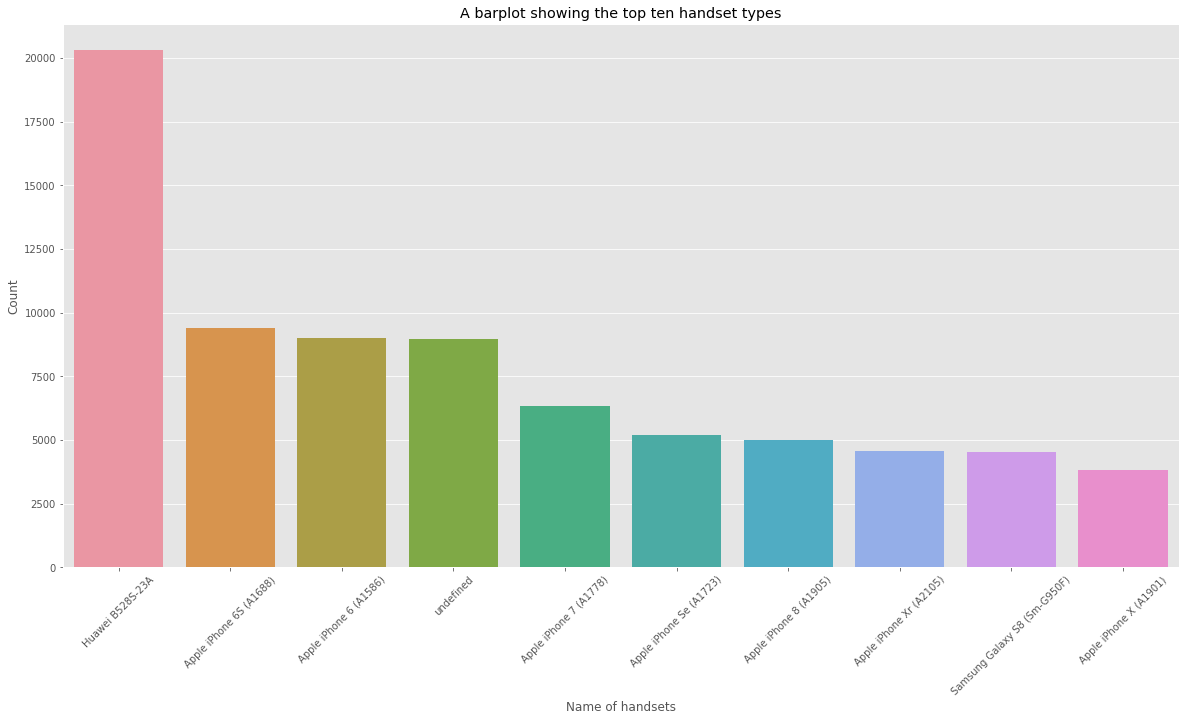

In [46]:
plt.figure(figsize=(20,10))
sns.barplot(x = top_ten['Handset Type'], y = top_ten['Count'])
plt.xlabel('Name of handsets')
plt.xticks(rotation=45)
plt.title('A barplot showing the top ten handset types');

#### Top 3 Handset Manufacturer

In [51]:
top_three = df['handset_manufacturer'].value_counts(ascending = False).head(3).reset_index()
top_three = top_three.rename(columns={'index':"Handset Manufacturer","handset_manufacturer":"Count"})
top_three

,Handset Manufacturer,Count
0,Apple,60137
1,Samsung,40839
2,Huawei,34423


#### Top 5 handset per Handset Manufacturer

In [63]:
top_fivemanf = df.groupby(['handset_manufacturer','handset_type'])['handset_type'].count().reset_index(name="count")

In [66]:
top_fivemanf=top_fivemanf.sort_values(['handset_manufacturer', 'count']).groupby('handset_manufacturer').head(5)
top_fivemanf

,handset_manufacturer,handset_type,count
0,A-Link Telecom International Co Limited,A-Link Telecom I. Cubot A5,1
1,A-Link Telecom International Co Limited,A-Link Telecom I. Cubot Note Plus,1
2,A-Link Telecom International Co Limited,A-Link Telecom I. Cubot Note S,1
3,A-Link Telecom International Co Limited,A-Link Telecom I. Cubot Nova,1
4,A-Link Telecom International Co Limited,A-Link Telecom I. Cubot Power,1
...,...,...,...
1382,Zte,Zte Blade A506 Blade A506 Dive 71 Orange Dive ...,1
1393,ZyXEL Communications Corp,Zyxel Communicat. Zyxel Wah7706,1
1394,Zyxel Communications Corp,Zyxel Communicat. Lte7460,1
1395,Zyxel Communications Corp,Zyxel Communicat. Sbg3600,1


####  Make a short interpretation to the marketing team 


     Top ten handset

    From the list of top ten Handset we can observe that the most purchase unique Handset is *Huawei B528S-23A* is our most used handset while Apple IPhone is the most purchased in our Top ten Handset, Samsung also appear in the list as one of the top ten phone
    

     Recommendations
        we should try to make our service tailored for this brands.

#### Overview of Users Behavior


Bearer ID according to our data description is unique for each session, the bearer ID is our unique session identifier so to identify each session we would the bearer ID here to group them, and count them to know the total number of Unique sessions

In this analysis we would be using MSISDN as a unique identifier for each users

####  number of xDR sessions

In [67]:
df['bearer_id'].value_counts()

                        991
13042425979269199872     16
13042425965944199168     10
13042425972278300672      9
13042425978774599680      9
                       ... 
13042425959245500416      1
13114483564761300992      1
7277825665743110144       1
7277825669917429760       1
13114483555887499264      1
Name: bearer_id, Length: 134709, dtype: int64

    There is a misnomer in the first row in our Bearer ID
    I dropped all rows without Bearer ID, since we
    cannot confirm if they had more than one session or not

the total number of unique Session in our dataset is the number of unique Bearer ID

In [74]:
bearer_id = pd.DataFrame(df[['msisdn/number','bearer_id']])
bearer_id= bearer_id.loc[bearer_id['bearer_id'] != '']

In [79]:
NumberOfSessions=bearer_id.groupby('msisdn/number').agg({'bearer_id': 'count'}).reset_index()
NumberOfSessions=NumberOfSessions.rename(columns= {'bearer_id': 'xDR sessions'})

In [82]:
NumberOfSessions.head()

,msisdn/number,xDR sessions
0,3.360100e+10,1
1,3.360100e+10,1
2,3.360100e+10,1
3,3.360101e+10,1
4,3.360101e+10,2


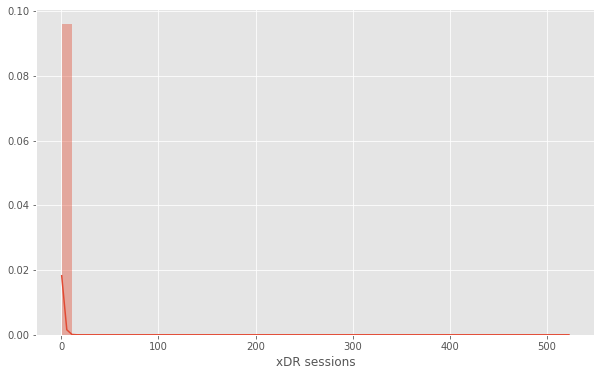

In [89]:
plt.subplots(figsize=(10, 6))
sns.distplot(NumberOfSessions["xDR sessions"], hist=True )

#### Session Duration

In [90]:
SessionDuration =df.groupby('msisdn/number').agg({'dur._(ms).1': 'sum'}).reset_index()
#here is the duration for first five rows in our dataset

SessionDuration.head()

,msisdn/number,dur._(ms).1
0,3.360100e+10,116720140.0
1,3.360100e+10,181230963.0
2,3.360100e+10,134969374.0
3,3.360101e+10,49878024.0
4,3.360101e+10,37104453.0


In [ ]:
SessionDuration['dur._(ms).1'].describe()

In [ ]:
SessionDuration['dur._(ms).1'].value_counts(

In [ ]:
SessionDuration.describe().T

In [ ]:
sns.boxplot(SessionDuration["dur._(ms).1"])

In [ ]:
plt.hist(SessionDuration["dur._(ms).1"])

In [ ]:
SessionDuration.describe().T

In [ ]:
UpDownload_user = df[['msisdn/number','total_ul_(bytes)','total_dl_(bytes)']]
UpDownload_user = UpDownload_user.groupby('msisdn/number').sum().reset_index()
UpDownload_user.drop(['msisdn/number'], axis=1, inplace=True)
UpDownload_user.describe()

In [ ]:
UpDownload_user

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(30, 10))
ax[0].hist(total_updown);
sns.boxplot(UpDownload_user["Applications UL/DL (bytes)"],ax=ax[1]);
ax[0].title.set_text('Histogram showing the Total  Data Usage by all Applications in Bytes')
ax[1].title.set_text('Box Plot showing the Total Data Usage by all Applications in Bytes')
ax[2].title.set_text('Distribution Plot showing the Total Data Usage  by all Applications in Bytes')
sns.distplot(total_updown["Applications UL/DL (bytes)"], ax=ax[2]);
fig.savefig('Applications.jpeg')

In [ ]:
total_updown['Applications UL/DL (bytes)'].describe()

In [ ]:
applicationDownUp =df[['social_media_dl_(bytes)','social_media_ul_(bytes)', 'google_dl_(bytes)',
                        'google_ul_(bytes)', 'email_dl_(bytes)', 'email_ul_(bytes)', 'youtube_dl_(bytes)',
                        'youtube_ul_(bytes)','netflix_dl_(bytes)', 'netflix_ul_(bytes)', 'gaming_dl_(bytes)',
                        'gaming_ul_(bytes)','other_dl_(bytes)', 'other_ul_(bytes)']]
total_updown = pd.DataFrame()
total_updown["social_media_total(bytes)"] = df["social_media_dl_(bytes)"] + df['social_media_ul_(bytes)']
total_updown["google_total(bytes)"] = df["google_dl_(bytes)"] + df["google_ul_(bytes)"]
total_updown['email_total(bytes)'] = df["email_dl_(bytes)"] + df["email_ul_(bytes)"]
total_updown['youtube_total(bytes)'] = df["youtube_dl_(bytes)"] + df["youtube_ul_(bytes)"]
total_updown['netflix_total(bytes)'] = df["netflix_dl_(bytes)"] + df["netflix_ul_(bytes)"]
total_updown["gaming_total(bytes)"] = df["gaming_dl_(bytes)"] + df["gaming_ul_(bytes)"]
total_updown['other_total(bytes)']=df["other_dl_(bytes)"]+df["other_ul_(bytes)"]

In [ ]:
total_updown["Total Applications (bytes)"]= total_updown['social_media_total(bytes)'] + total_updown['google_total(bytes)']+ total_updown['email_total(bytes)']+ total_updown['youtube_total(bytes)']+ total_updown['netflix_total(bytes)']+ total_updown['gaming_total(bytes)']+ total_updown['other_total(bytes)']

The public IP has basic 
Public IP and assignment
There are two different types of Public IP address 
Dynamic which is created after the resource
Static Address is created before the resource and do not change

Private IP are assigned with Vnet
The are assigned for Internal load balancer, Application Gateway
Type Private Static and Dynamic 
We never 

DHCP 
Azure controls this totally

In [ ]:
total_updown.describe().T

In [ ]:
new = pd.DataFrame(total_updown.sum(axis=0, skipna=True))

In [ ]:
new =new.reset_index()

In [ ]:
new= new.rename(columns={'index':"Applications",0:"Sum"})

In [ ]:
new = new[:7]


In [ ]:
new

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x="Applications", y="Sum", data=new)
plt.xticks(rotation=45)
plt.title("A Bar plot showing the data consumption for each Applications",fontsize = 12, fontweight= "bold")
plt.xticks(fontsize = 10, fontweight= "bold")
plt.tight_layout()
plt.savefig("totaL.jpeg")

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(20, 10))
ax[0].hist(total_updown['social_media_total(bytes)','netflix_total(bytes)']);
ax[0].title.set_text('Histogram showing the Total Social Media Data Usage in Bytes')
ax[1].title.set_text('Box Plot showing the Total Social Media Data Usage in Bytes')
ax[1] =sns.boxplot(total_updown[['social_media_total(bytes)','netflix_total(bytes)']]);
fig.savefig('full_figure.png')

In [ ]:
print("Kurtosis for Duration of Call is", pd.DataFrame(total_updown["Total Applications (bytes)"]).kurtosis()[0], "Skewedness of Duration of call is",
      pd.DataFrame(total_updown["Total Applications (bytes)"]).skew()[0],
    sep='\n'
)

In [ ]:
total_updown["Total Applications (bytes)"] = total_updown["Total Applications (bytes)"].astype("int16")

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(30, 10))
ax[0].hist(total_updown);
sns.boxplot(total_updown["Total Applications (bytes)"],ax=ax[1]);
ax[0].title.set_text('Histogram showing the Total  Data Usage by all Applications in Bytes')
ax[1].title.set_text('Box Plot showing the Total Data Usage by all Applications in Bytes')
ax[2].title.set_text('Distribution Plot showing the Total Data Usage  by all Applications in Bytes')
sns.distplot(total_updown["Total Applications (bytes)"], ax=ax[2]);
fig.savefig('Applications.jpeg')

In [ ]:
print("Kurtosis for Duration of Call is", pd.DataFrame(total_updown["google_total(bytes)"]).kurtosis()[0], "Skewedness of Duration of call is",
      pd.DataFrame(total_updown["google_total(bytes)"]).skew()[0],
    sep='\n'
)

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(30, 10))
ax[0].hist(total_updown["Total Applications (bytes)"]);
sns.boxplot(total_updown["Total Applications (bytes)"], ax=ax[1]);
ax[0].title.set_text('Histogram showing the Total  Data Usage by all Applications in Bytes')
ax[1].title.set_text('Box Plot showing the Total Data Usage by all Applications in Bytes')
ax[2].title.set_text('Distribution Plot showing the Total Data Usage  by all Applications in Bytes')
sns.distplot(total_updown["Total Applications (bytes)"], ax=ax[2]);
fig.savefig('Applications.jpeg')

In [ ]:
print("Kurtosis for Duration of Call is", pd.DataFrame(total_updown["email_total(bytes)"]).kurtosis()[0], "Skewedness of Duration of call is",
      pd.DataFrame(total_updown["email_total(bytes)"]).skew()[0],
    sep='\n'
)

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(30, 10))
ax[0].hist(total_updown["youtube_total(bytes)"]);
sns.boxplot(total_updown["youtube_total(bytes)"], ax=ax[1]);
ax[0].title.set_text('Histogram showing the Total  Data Usage on Youtube in Bytes')
ax[1].title.set_text('Box Plot showing the Total Data Usage on Youtube in Bytes')
ax[2].title.set_text('Distribution Plot showing the Total Data Usage on Youtube in Bytes')
sns.distplot(total_updown["youtube_total(bytes)"], ax=ax[2]);
fig.savefig('Youtube.jpeg')

In [ ]:
print("Kurtosis for the total Upload/Download is", pd.DataFrame(total_updown["youtube_total(bytes)"]).kurtosis()[0], "Skewedness of Duration of call is",
      pd.DataFrame(total_updown["youtube_total(bytes)"]).skew()[0],
    sep='\n'
)

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(30, 10))
ax[0].hist(total_updown["netflix_total(bytes)"]);
sns.boxplot(total_updown["netflix_total(bytes)"], ax=ax[1]);
ax[0].title.set_text('Histogram showing the Total Netflix Data Usage in Bytes')
ax[1].title.set_text('Box Plot showing the Total Netflix Data Usage in Bytes')
ax[2].title.set_text('Distribution Plot showing the Total Netflix Data Usage in Bytes')
sns.distplot(total_updown["netflix_total(bytes)"], ax=ax[2]);
fig.savefig('netflix.jpeg')

In [ ]:
print("Kurtosis for the total Upload/Download is", pd.DataFrame(total_updown["netflix_total(bytes)"]).kurtosis()[0], "Skewedness of Duration of call is",
      pd.DataFrame(total_updown["netflix_total(bytes)"]).skew()[0],
    sep='\n'
)


In [ ]:
email_total(bytes) 	106,856.00 	3,148,795.81 	2,222,400.10 	18,176.00 	1,674,481.00 	2,799,824.50 	3,847,197.50 	42,418,782.00
youtube_total(bytes) 	106,856.00 	31,558,399.28 	21,294,917.68 	78,903.00 	18,631,088.50 	26,800,376.00 	37,927,975.75 	452,958,769.00
netflix_total(bytes) 	106,856.00 	31,538,332.31 	21,289,556.97 	184,569.00 	18,555,972.75 	26,718,889.50 	37,976,957.00 	399,519,079.00
gaming_total(bytes) 	106,856.00 	599,769,010.72 	449,150,462.40 	306,358.00 	288,063,112.50 	542,349,206.50 	777,304,138.00 	7,749,432,234.00
other_total(bytes)

Here is my analysis on the Social Media Byte, 

Conduct a Non-Graphical Univariate Analysis by computing position & dispersion parameters for each quantitative variable and provide useful interpretation.(jupyter notebook)

In [ ]:
df.describe().T

In [ ]:
df["Dur._(ms)"].describe()

In [ ]:
print(df["dur._(ms).1"].describe())
ax= sns.distplot(df["dur._(ms).1"]);

In [ ]:
ax= plt.hist(df["Dur._(ms)"])

In [ ]:
ax = sns.boxplot(x=df["Dur._(ms)"])
print("Kurtosis for Duration of Call is", pd.DataFrame(x).kurtosis()[0], "Skewedness of Duration of call is",
      pd.DataFrame(x).skew()[0],
    sep='\n'
)

In [ ]:
print("Kurtosis for Duration of Call is", pd.DataFrame(x).kurtosis()[0], "Skewedness of Duration of call is",
      pd.DataFrame(x).skew()[0],
    sep='\n'
)

#### The Univariate Analysis for Average Round Trip Time measurement Downlink direction (msecond)

In [ ]:
df['Avg_RTT_DL_(ms)'].value_counts()

In [ ]:
ax= sns.distplot(df["Avg_RTT_DL_(ms)"])

In [ ]:
ax= plt.hist(df["Avg_RTT_DL_(ms)"])

In [ ]:
ax = sns.boxplot(df["Avg_RTT_DL_(ms)"])

In [ ]:
print("Kurtosis for Duration of Call is", pd.DataFrame(df["Avg_RTT_DL_(ms)"]).kurtosis()[0], "Skewedness of Duration of call is",
      pd.DataFrame(df["Avg_RTT_DL_(ms)"]).skew()[0],
    sep='\n'
)

In [ ]:
df[["Social_Media_DL_(Bytes)","Social_Media_UL_(Bytes)","Google_DL_(Bytes)","Google_UL_(Bytes)","Email_DL_(Bytes)","Email_UL_(Bytes)","Youtube_DL_(Bytes)","Youtube_UL_(Bytes)","Netflix_DL_(Bytes)","Netflix_UL_(Bytes)","Gaming_DL_(Bytes)","Gaming_UL_(Bytes)","Other_DL_(Bytes)","Other_UL_(Bytes)"]]

#### Variable transformations – segment the users into top five decile classes based on the total duration for all sessions and compute the total data (DL+UL) per decile class. 

In [ ]:
df.head()

In [ ]:
df_duration = df2[['MSISDN/Number','Dur._(ms)','Total_UL_(Bytes)','Total_DL_(Bytes)']]

In [ ]:
df2.head()

In [ ]:
df_duration['Dur._(ms)']= df['Dur._(ms).1']

In [ ]:
df_duration

In [ ]:
df_duration['decile']=pd.qcut(df_duration['Dur._(ms)'], q=10, labels=False)

In [ ]:
df_duration

In [ ]:
df['decile']